<a href="https://colab.research.google.com/github/rajkdarbar/machine-learning/blob/main/building_a_simple_neural_net_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **building a neural network from scratch using only numpy library**

It took me a while to understand the backpropagation step. Here is a list of references that helped me in this learning process:

*   [Backpropagation Intuition](https://www.youtube.com/watch?v=yXcQ4B-YSjQ&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0&index=35&ab_channel=DeepLearningAI)
*   [A Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
*   [Basics of Deep Learning Part 13: Implementing the Backpropagation Algorithm with NumPy](https://www.youtube.com/watch?v=ZVi647MYeXU&list=PLPOTBrypY74wOpTIWQhqNdfV5gIt1h1fa&index=15&ab_channel=SebastianMantey)
*   [Building a Neural Network from scratch: MNIST Project](https://www.youtube.com/watch?v=0idoEomDc9E&ab_channel=MLForNerds)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load training data from google drive

train_file = open("/content/drive/MyDrive/mnist dataset/mnist_train.csv", 'r')
train_list = train_file.readlines()
train_list = train_list
train_file.close()

print(len(train_list))

60000


In [ ]:
train_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

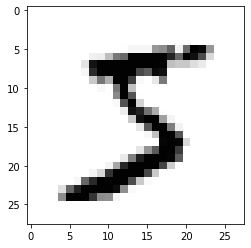

In [ ]:
values = train_list[0].split(",")
image_array = np.asfarray(values[1:]).reshape(28,28)
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [ ]:
# load test data from google drive
test_file = open("/content/drive/MyDrive/mnist dataset/mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()

print(len(test_list))

10000


In [ ]:
# create a neural network with two hidden layes

class DNN:

  def __init__(self, sizes, epochs, lr):
    self.sizes = sizes
    self.epochs = epochs
    self.lr = lr

    input_layer = sizes[0]
    hidden_layer_1 = sizes[1]
    hidden_layer_2 = sizes[2]
    output_layer = sizes[3]
    
    np.random.seed(1)
    self.W1 = np.random.randn(hidden_layer_1, input_layer) * np.sqrt(1 / hidden_layer_1) # 32x784

    np.random.seed(2)
    self.W2 = np.random.randn(hidden_layer_2, hidden_layer_1) * np.sqrt(1 / hidden_layer_2) # 16x32

    np.random.seed(3)
    self.W3 = np.random.randn(output_layer, hidden_layer_2) * np.sqrt(1 / output_layer) # 10x16


  def sigmoid(self, x, derivative = False):
    if derivative:
      return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1/(1 + np.exp(-x))


  def softmax(self, x, derivative = False):
    exps = np.exp(x - x.max()) # Numerically stable with large exponentials
    if derivative:
      return exps / np.sum(exps, axis = 0) * (1 - exps / np.sum(exps, axis = 0))
    return exps / np.sum(exps, axis = 0)


  def categorical_cross_entropy_loss(self, y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))


  def feedforward(self, x_train):
    # input layer to hidden layer 1
    self.Z1 = np.dot(self.W1, x_train)
    self.A1 = self.sigmoid(self.Z1)  

    # hidden layer 1 to hidden layer 2
    self.Z2 = np.dot(self.W2, self.A1)
    self.A2 = self.sigmoid(self.Z2)

    # hidden layer 2 to output layer
    self.Z3 = np.dot(self.W3, self.A2)    
    self.A3 = self.softmax(self.Z3) # softmax activation
    return self.A3


  def backpropagation(self, x_train, y_train, output):
    # calculate W3 update
    error = 2 * (output - y_train) / output.shape[0] * self.softmax(self.Z3, derivative = True) # output.shape[0] = 10 in our case
    change_w3 = np.outer(error, self.A2) 

    # calculate W2 update
    error = np.dot(self.W3.T, error) * self.sigmoid(self.Z2, derivative = True)
    change_w2 = np.outer(error, self.A1)

    # calculate W1 update
    error = np.dot(self.W2.T, error) * self.sigmoid(self.Z1, derivative = True)
    change_w1 = np.outer(error, x_train)

    # update all weights
    self.W3 -= self.lr * change_w3
    self.W2 -= self.lr * change_w2
    self.W1 -= self.lr * change_w1


  def train(self, train_list, output_nodes):
    for iteration in range(self.epochs):
      predictions = []
      loss_dict = []

      for x in train_list:
        img_values = x.split(',')
        # scale and shift the inputs
        input = ((np.asfarray(img_values[1:]) / 255.0) * 0.99) + 0.01        

        # output_nodes represents the number of nodes at the output layer
        target = np.zeros(output_nodes) + 0.01 
        # image_values[0] is the target label for this sample
        target[int(img_values[0])] = 0.99 

        output = self.feedforward(input) # output from feedforward pass
        self.backpropagation(input, target, output)

        pred = np.argmax(output)
        predictions.append(pred == np.argmax(target))

        # calculating loss per epoch
        loss = self.categorical_cross_entropy_loss(target, output)
        loss_dict.append(loss)

      train_accuracy = np.mean(predictions)
      train_loss = np.mean(loss_dict)
      print (f'Epoch: {iteration}  | Train Loss: {train_loss} | Train Acc: {train_accuracy}')


  def prediction_test_data(self, test_list, output_nodes):
    predictions = []

    for x in test_list:
      img_values = x.split(',')
      input = ((np.asfarray(img_values[1:]) / 255.0) * 0.99) + 0.01 
      target = np.zeros(output_nodes) + 0.01 
      target[int(img_values[0])] = 0.99 

      output = self.feedforward(input)
      pred = np.argmax(output)
      predictions.append(pred == np.argmax(target))

    test_accuracy = np.mean(predictions) 
    print('Test accuracy is: ', test_accuracy)


In [ ]:
dnn = DNN(sizes = [784, 32, 16, 10], epochs = 3, lr = 0.01)
dnn.train(train_list, 10)
dnn.prediction_test_data(test_list, 10)

Epoch: 0  | Train Loss: 2.518600072737604 | Train Acc: 0.20333333333333334
Epoch: 1  | Train Loss: 2.335114888961107 | Train Acc: 0.25248333333333334
Epoch: 2  | Train Loss: 2.105651922609091 | Train Acc: 0.3829
Test accuracy is:  0.4587
